# Projet de MACS partie 3
## Antoine Habis

In [2]:
load('projectData.Rdata')
source('evalTools.R')
source('mesfonctions.r')

In [4]:
a = GRILLE[1]
b = 2.5
n = 47
delta = 0.9
t = 1
Tab_t = 1 + (delta**(1:n))*t
Tab_x = sapply(Tab_t,FUN=evalX)
Tab_y = sapply(Tab_x,FUN=evalHeight)
Tab_c = dividif(Tab_x,Tab_y)



X_arange = seq(a,b,10000)

Y_interpol_1 = Methode_horner_Newton(Tab_c,Tab_x,X_arange[1])
paste('l estimation  de Height(1) à l aide de la methode de Richardson est de',toString(Y_interpol_1))



[1] "l estimation  de Height(1) à l aide de la methode de Richardson est de 3.2242591983317"

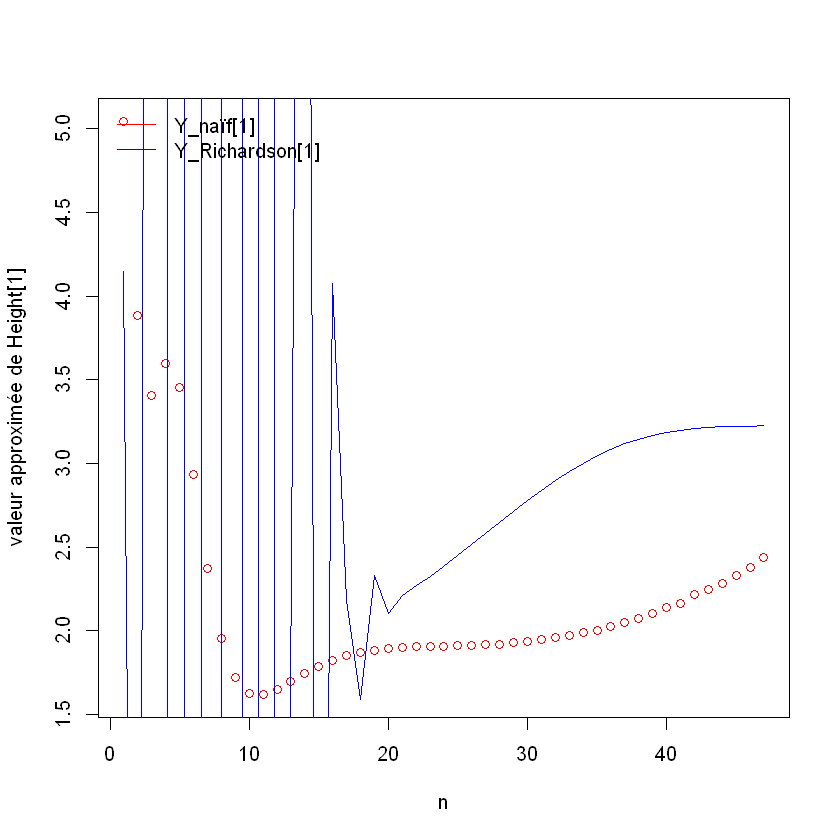

In [5]:
Y_interpols=c()
Y_naifs=c()
for (n in (1:47)){
    delta = 0.9
    t = 1
    Tab_t = 1 + (delta**(1:n))*t
    Tab_x = sapply(Tab_t,FUN=evalX)
    Tab_y = sapply(Tab_x,FUN=evalHeight)
    Tab_c = dividif(Tab_x,Tab_y)
    X_arange = seq(a,b,10000)
    Y_naifs = c(Y_naifs,evalHeight(Tab_t[n]))
    Y_interpols = c(Y_interpols,Methode_horner_Newton(Tab_c,Tab_x,X_arange[1]))
}

plot((1:47),Y_naifs,col="red",xlab="n",ylab="valeur approximée de Height[1]")
lines((1:47),Y_interpols,col="blue",xlab="n",ylab="Y Richardson[1]")

# Ajouter une légende
legend(1, 95, legend=c("Y_naïf", "Y Richardson"),
       col=c("red", "blue"), lty=1:2, cex=0.8)

  legend(x="topleft",c("Y_naïf[1]","Y_Richardson[1]"),col=c("red","blue"),lty=c(1,1),bty="n")

On observe que pour un nombre de noeuds relativement faible $n\in[0,18]$, la valeur de Height[1] approximée par la methode de Richardson est completement instable.

Cependant, lorsque l'on augmente le nombre de noeuds, cette valeur se stabilise vers ce qui semble être Height[1].

Comme on peut le voir sur le graphe, l'erreur naïve se stabilise vers une autre valeur qui ne semble pas être la vraie valeur de Height[1].

en effet on sait que:

$Height(0)-Ln\;Height(t)=O(\delta^{\frac{n(n+1)}{2}}t^{n+1})$

tandisque 

$Height(0)=Height(\delta^n t)+O(\delta^n t)$